In [80]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import load_breast_cancer
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, precision_score, recall_score, confusion_matrix, classification_report, make_scorer

In [81]:
df=pd.DataFrame(load_breast_cancer()['data'],columns=load_breast_cancer()['feature_names'])
df['y'] = load_breast_cancer()['target']

In [82]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

In [84]:
dtc=DecisionTreeClassifier()
dtc=dtc.fit(X_train,y_train)
y_pred=dtc.predict(X_test)
y_train_pred=dtc.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


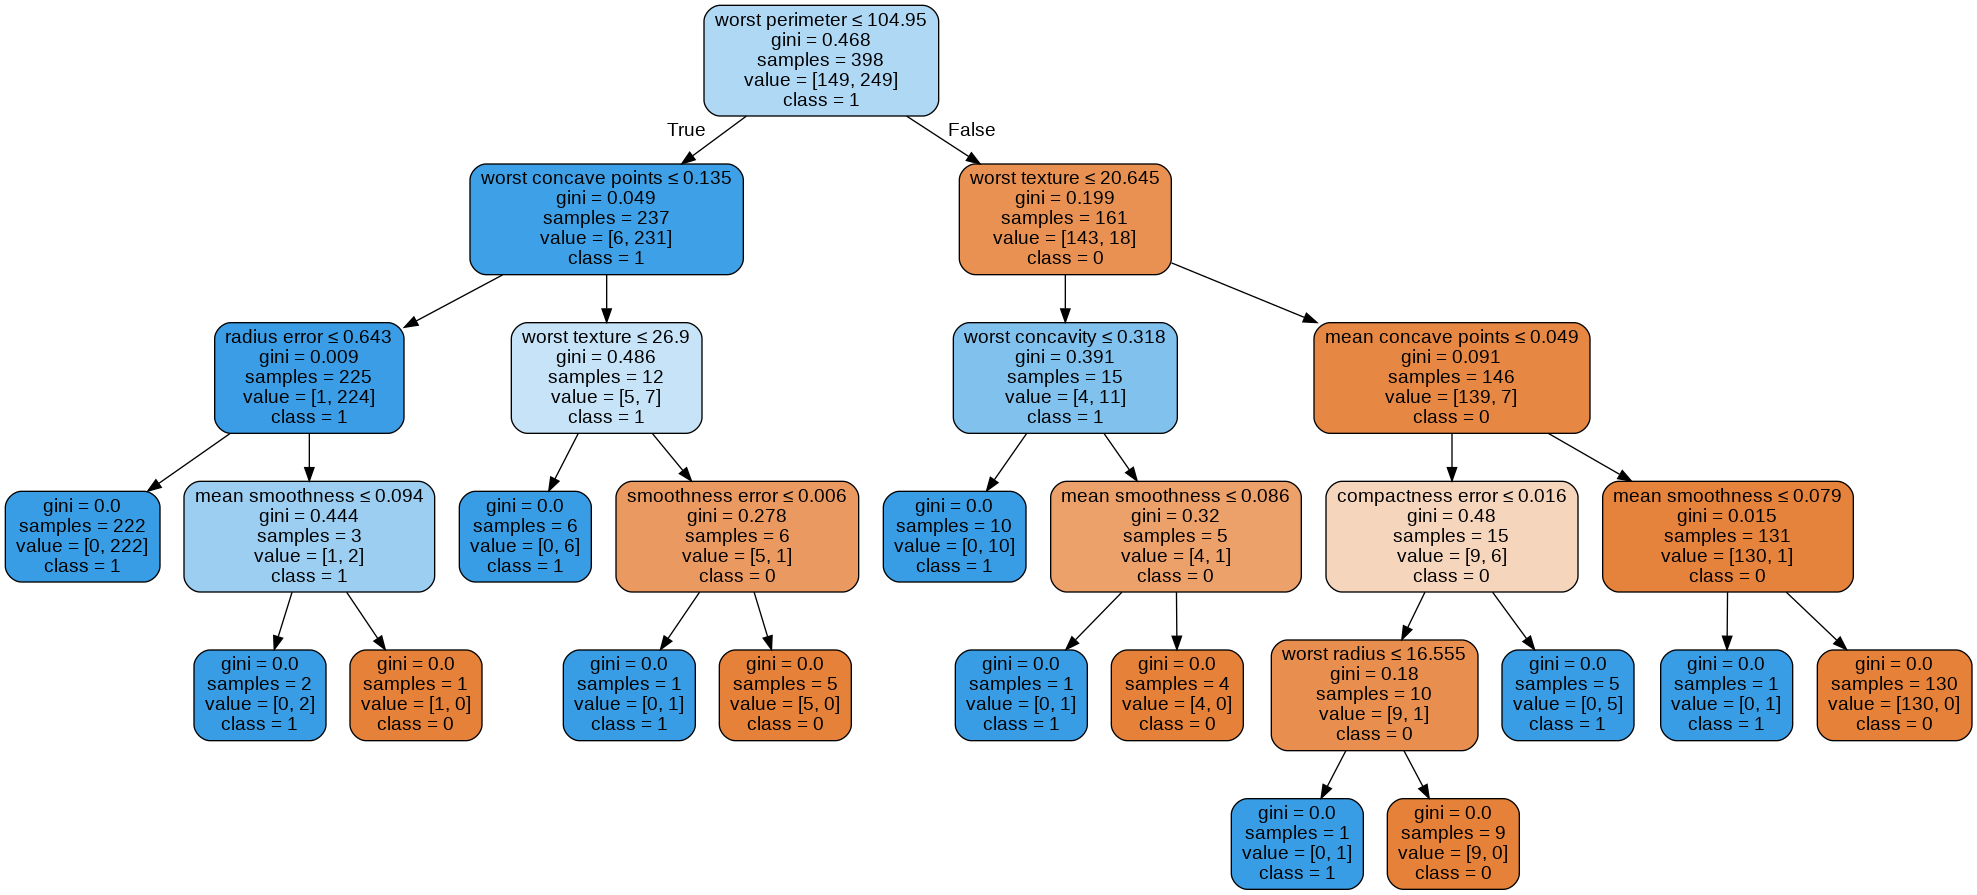

In [86]:
from sklearn.tree import export_graphviz 
from io import StringIO 
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(dtc,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer.png')
Image(graph.create_png())

In [87]:
h={"criterion":["gini","entropy"],"max_depth":[10, 20, 50, 100],"min_samples_leaf":[10, 20, 50]}
decision_tree=GridSearchCV(DecisionTreeClassifier(),h)
decision_tree=decision_tree.fit(X_train,y_train)
y_pred = decision_tree.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8654970760233918


In [88]:
y_train_pred = decision_tree.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 0.957286432160804


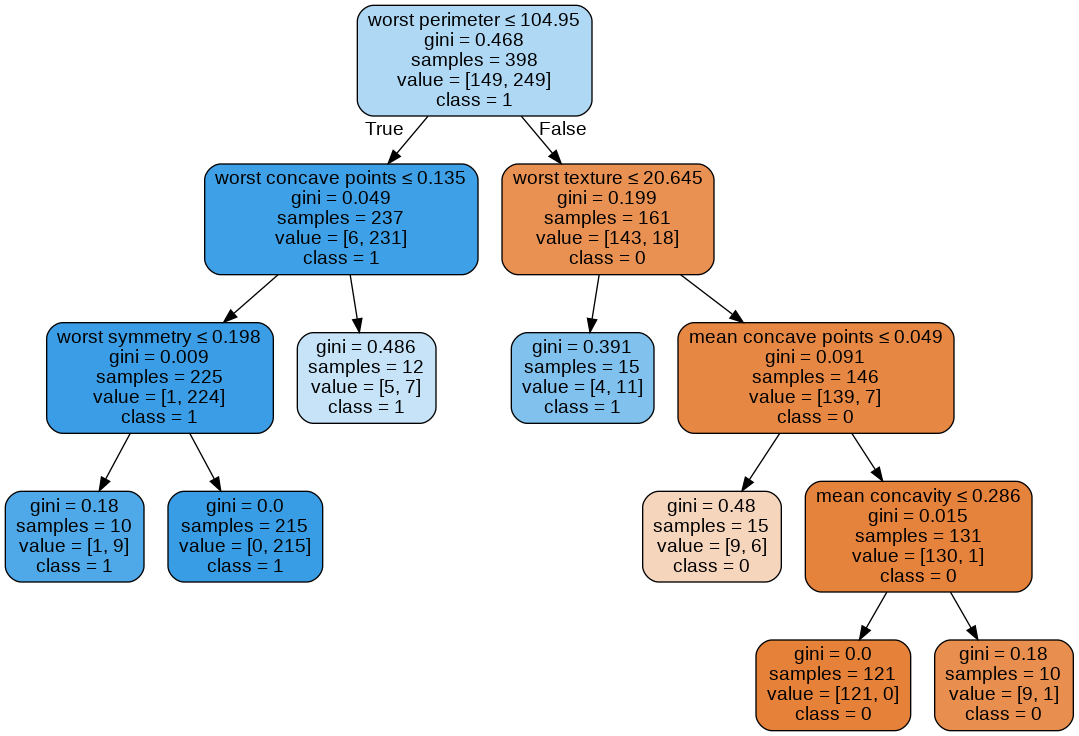

In [89]:
dot_data = StringIO()
export_graphviz(decision_tree.best_estimator_,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=x.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('breastcancer1.png')
Image(graph.create_png())

Random Forest Classifier

In [90]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=999)

In [91]:
random_forest=RandomForestClassifier(random_state=0, warm_start = True)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print("Recall Score:",recall_score(y_test, y_pred))     
print("Precision Score:",precision_score(y_test, y_pred))  
print("ROC AUC Score:",roc_auc_score(y_test, y_pred)) 
print("Confustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

Recall Score: 0.9906542056074766
Precision Score: 0.9814814814814815
ROC AUC Score: 0.9797021028037383
Confustion matrix on validation data: 
[[ 62   2]
 [  1 106]]


In [92]:
positive_weight=sum(y_train == 0)/sum(y_train == 1)
random_forest=RandomForestClassifier(random_state=0,class_weight={0:1,1:positive_weight},warm_start = True)
random_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 1, 1: 0.592}, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=True)

In [93]:
y_pred = random_forest.predict(X_test)
print("Recall Score:",recall_score(y_test, y_pred))     
print("Precision Score:",precision_score(y_test, y_pred))  
print("ROC AUC Score:",roc_auc_score(y_test, y_pred)) 
print("\nConfustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

Recall Score: 0.9906542056074766
Precision Score: 0.9814814814814815
ROC AUC Score: 0.9797021028037383

Confustion matrix on validation data: 
[[ 62   2]
 [  1 106]]


In [94]:
def scoring(ground_truth, predictions):
    cm=confusion_matrix(ground_truth, predictions)
    fp = cm[0, 1]
    fn = cm[1, 0]
    return  fn*(1/63)+fp*(2/108)

In [95]:
loss_score=make_scorer(scoring, greater_is_better = False)

In [96]:
rtc=GridSearchCV(RandomForestClassifier(random_state=0, warm_start = True),h,scoring = loss_score)
rtc.fit(X_train, y_train)
y_pred = rtc.predict(X_test)
print("Recall Score:",recall_score(y_test, y_pred))     
print("Precision Score:",precision_score(y_test, y_pred))  
print("ROC AUC Score:",roc_auc_score(y_test, y_pred))    
print("\nConfustion matrix on validation data: \n" + str(confusion_matrix(y_test, y_pred)))

Recall Score: 0.9906542056074766
Precision Score: 0.9724770642201835
ROC AUC Score: 0.9718896028037383

Confustion matrix on validation data: 
[[ 61   3]
 [  1 106]]


Gradient Boosting Method Classification

In [97]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify = y, random_state=999)

In [98]:
gbc=GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(X_train,y_train)
print(classification_report(y_test,gbc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Confusion Matrix : 
 [[ 61   3]
 [  1 106]]
Accuracy Score is 0.9766
Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97        64
           1       0.97      0.99      0.98       107

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

AUC-ROC: 0.9718896028037383
LOGLOSS Value is 0.8079


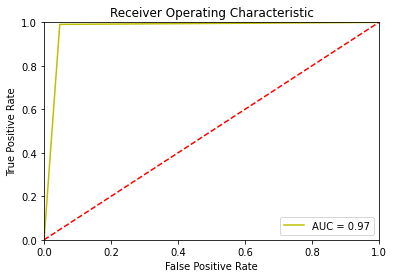

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, log_loss, roc_curve, auc
y_pred = gbc.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
results = confusion_matrix(y_test, y_pred)
print ('Confusion Matrix : \n', results)
print ('Accuracy Score is %.4f' % (accuracy_score(y_test, y_pred)))
print ('Classification Report : \n', classification_report(y_test, y_pred))
print('AUC-ROC:',roc_auc_score(y_test, y_pred))
print('LOGLOSS Value is %.4f' % log_loss(y_test, y_pred))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Nearest Neighbour

In [100]:
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier(n_neighbors=3)  # k=3
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9298245614035088


In [101]:
knc=KNeighborsClassifier(n_neighbors=5)  # k=5
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9415204678362573


In [102]:
knc=KNeighborsClassifier(n_neighbors=7)  # k=7
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9473684210526315


In [103]:
# K-Neighbours Classifiers gave an accuracy of 0.9473684210526315 with n=7 neighbours
#
# Gradient Boosting Classifier gave 0.98 accuracy
#
# Decision Tree gave 0.8654970760233918 accuracy
#
# Random Forest Classifier gave 0.9724770642201835 precision score
#
#
#